In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20, 20)
import matplotlib.image as mpimg
import cv2
import numpy as np
from calibration import calibration, undistort
from binarization import binarize

In [2]:
"""
Get onboard perspective view which is so-called `bird-eye`
Args:
  img: grayscaled image
  verbose
Return:
  warped image, and both forward and backward transformation matrices
"""
def birdeye(img, verbose=False):
    h, w = img.shape[:2]
    
    src = np.float32([[w, h-10], # back right
                      [0, h-10], # back left
                      [546, 460], # front left
                      [732, 460]]) # front right
    
    dst = np.float32([[w, h], # back right
                      [0, h], # back left
                      [0, 0], # front left
                      [w, 0]]) # front right
    
    M = cv2.getPerspectiveTransform(src, dst)
    Minv = cv2.getPerspectiveTransform(dst, src)
    
    warped = cv2.warpPerspective(img, M, (w, h), flags=cv2.INTER_LINEAR)
    
    if verbose:
        fig, ax = plt.subplots(1, 2)
        ax[0].set_title('Before perspective transform')
        ax[0].imshow(img)
        for point in src:
            ax[0].plot(*point, marker='.', markersize=12)
        ax[0].set_axis_off()
        
        ax[1].set_title('After perspective transform')
        ax[1].imshow(warped)
        for point in dst:
            ax[1].plot(*point, marker='.', markersize=12)
        ax[1].set_axis_off()
        
        plt.show()
        
    return warped, M, Minv

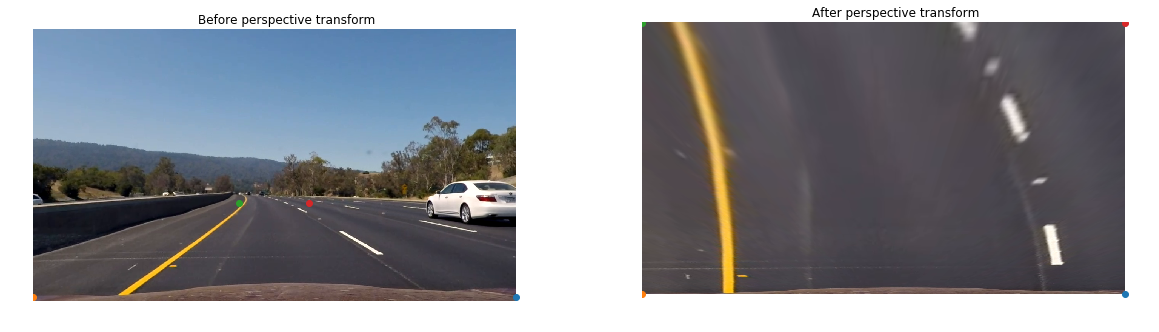

In [3]:
ret, mtx, dist, rvecs, tvecs = calibration('camera_cal')
img = mpimg.imread('singleshot/test.jpg')
img_undistorted = undistort(img, mtx, dist)
img_binary = binarize(img_undistorted)
img_birdeye, M, Minv = birdeye(img_undistorted, verbose=True)